# TSNE Analysis

In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

## Download from Atlas and Load Data

In [3]:
ens_codes = [
    "PED00423e001",
    "PED00424e001"
]
data_dir = 'C:/Users/nikol/Documents/test_dir'

analysis = EnsembleAnalysis(ens_codes, data_dir)
#analysis.download_from_database(database='atlas')

In [4]:
analysis.generate_trajectories()

Trajectory already exists for ensemble PED00423e001. Loading trajectory.
Trajectory already exists for ensemble PED00424e001. Loading trajectory.


In [5]:
analysis.random_sample_trajectories(sample_size=200)

## Featurization

In [6]:
analysis.perform_feature_extraction(featurization='phi_psi')

Performing feature extraction for Ensemble: PED00423e001.
Transformed ensemble shape: (200, 182)
Performing feature extraction for Ensemble: PED00424e001.
Transformed ensemble shape: (200, 182)
Feature names: ['SER2-PHI', 'MET3-PHI', 'THR4-PHI', 'PRO5-PHI', 'SER6-PHI', 'THR7-PHI', 'PRO8-PHI', 'PRO9-PHI', 'ARG10-PHI', 'SER11-PHI', 'ARG12-PHI', 'GLY13-PHI', 'THR14-PHI', 'ARG15-PHI', 'TYR16-PHI', 'LEU17-PHI', 'ALA18-PHI', 'GLN19-PHI', 'PRO20-PHI', 'SER21-PHI', 'GLY22-PHI', 'ASN23-PHI', 'THR24-PHI', 'SER25-PHI', 'SER26-PHI', 'SER27-PHI', 'ALA28-PHI', 'LEU29-PHI', 'MET30-PHI', 'GLN31-PHI', 'GLY32-PHI', 'GLN33-PHI', 'LYS34-PHI', 'THR35-PHI', 'PRO36-PHI', 'GLN37-PHI', 'LYS38-PHI', 'PRO39-PHI', 'SER40-PHI', 'GLN41-PHI', 'ASN42-PHI', 'LEU43-PHI', 'VAL44-PHI', 'PRO45-PHI', 'VAL46-PHI', 'THR47-PHI', 'PRO48-PHI', 'SER49-PHI', 'THR50-PHI', 'THR51-PHI', 'LYS52-PHI', 'SER53-PHI', 'PHE54-PHI', 'LYS55-PHI', 'ASN56-PHI', 'ALA57-PHI', 'PRO58-PHI', 'LEU59-PHI', 'LEU60-PHI', 'ALA61-PHI', 'PRO62-PHI', 'PRO6

In [7]:
rg = analysis.rg_calculator()
len(rg)

400

## Dimensionality Reduction

In [8]:
analysis.fit_dimensionality_reduction(method='tsne', perplexity_vals = [10, 50, 90], circular=True, range_n_clusters=range(2,10,1))

tsne is running...


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

Best Perplexity: 90
Best Number of Clusters: 2


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

## Analysis

[  0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  17  18  19
  20  22  23  24  25  26  27  28  29  31  32  33  35  36  37  40  41  42
  43  44  45  47  48  49  50  51  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  77  79  80  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  99 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 120 121 122 123 124
 125 126 128 129 130 131 132 133 134 135 136 137 138 139 141 142 143 144
 145 146 147 148 149 151 152 153 154 155 156 157 158 159 160 161 162 163
 165 166 167 168 169 171 173 174 175 176 177 178 179 180 181 182 183 184
 186 187 188 189 190 191 192 193 194 195 196 197 198 220 228 273 295 305
 334 338 388] 0
[ 11  16  21  30  34  38  39  46  52  75  76  78  81  98 100 101 119 127
 140 150 164 170 172 185 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 221 222 223 224 225 226 227 229 230
 231 232 233 234 235 236 237 238 23

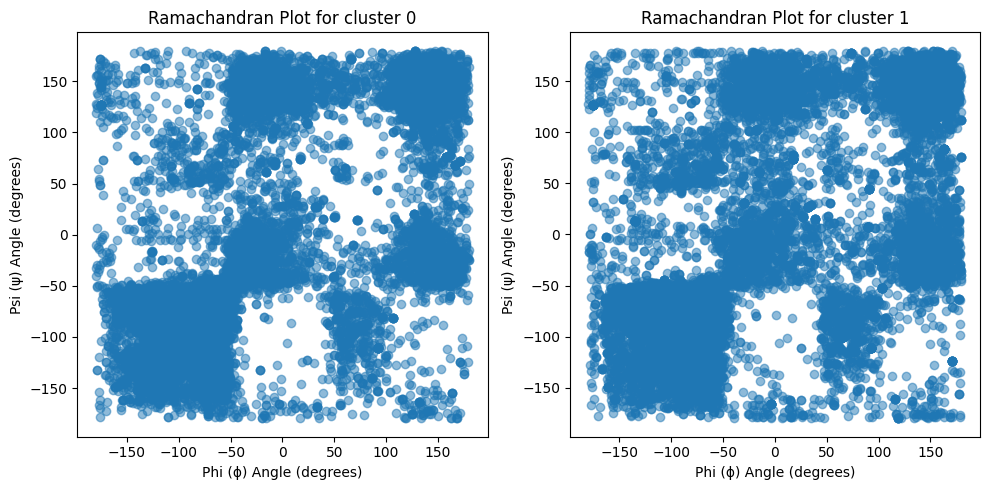

In [9]:
analysis.tsne_ramachandran_plot()

[  0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  17  18  19
  20  22  23  24  25  26  27  28  29  31  32  33  35  36  37  40  41  42
  43  44  45  47  48  49  50  51  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  77  79  80  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  99 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 120 121 122 123 124
 125 126 128 129 130 131 132 133 134 135 136 137 138 139 141 142 143 144
 145 146 147 148 149 151 152 153 154 155 156 157 158 159 160 161 162 163
 165 166 167 168 169 171 173 174 175 176 177 178 179 180 181 182 183 184
 186 187 188 189 190 191 192 193 194 195 196 197 198 220 228 273 295 305
 334 338 388]
[ 11  16  21  30  34  38  39  46  52  75  76  78  81  98 100 101 119 127
 140 150 164 170 172 185 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 221 222 223 224 225 226 227 229 230
 231 232 233 234 235 236 237 238 239 

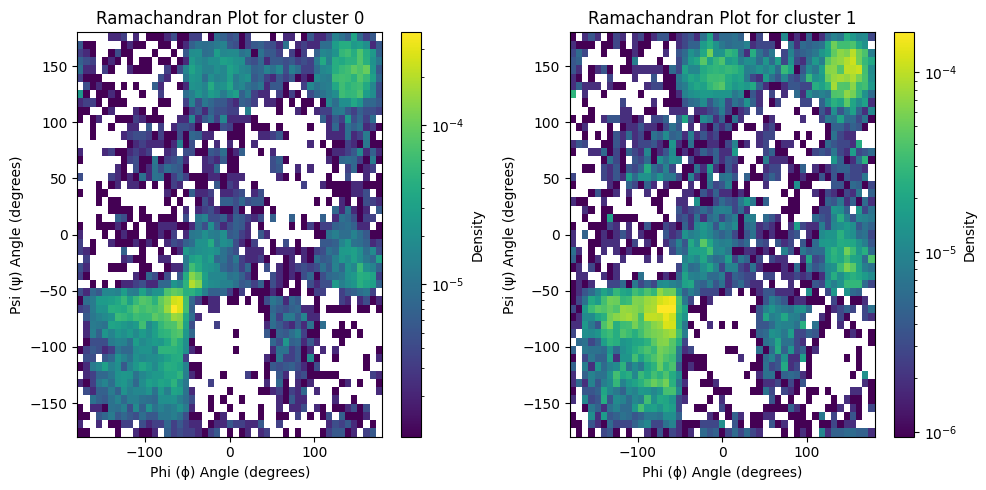

In [10]:
analysis.tsne_ramachandran_plot_density()

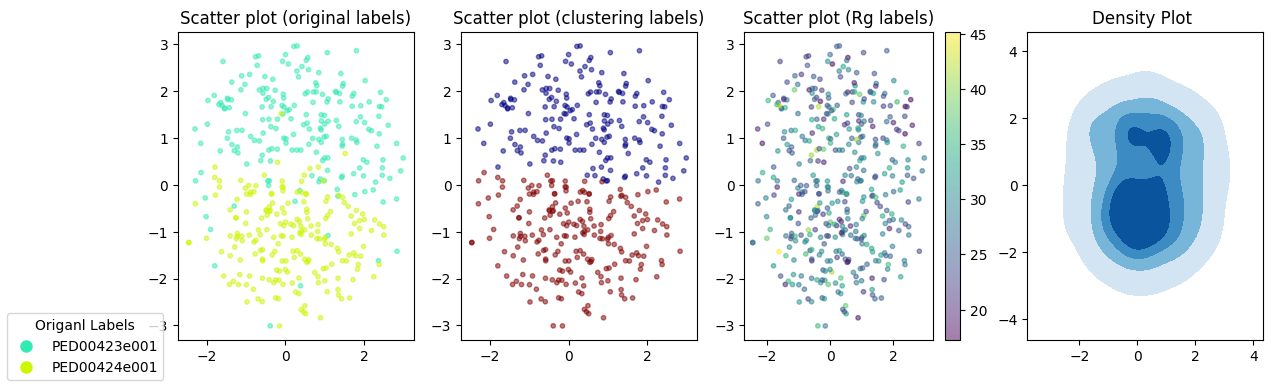

In [11]:
analysis.tsne_scatter_plot()

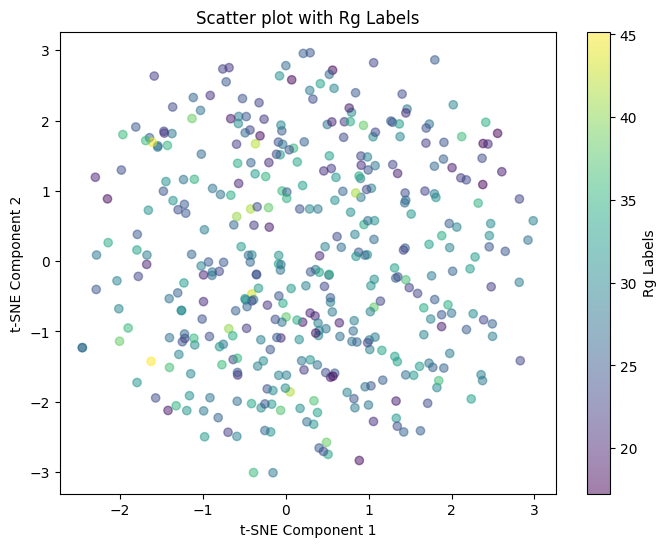

In [12]:
analysis.tsne_scatter_plot_2()

In [13]:
analysis.generate_tsne_report()

[  0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  17  18  19
  20  22  23  24  25  26  27  28  29  31  32  33  35  36  37  40  41  42
  43  44  45  47  48  49  50  51  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  77  79  80  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  99 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 120 121 122 123 124
 125 126 128 129 130 131 132 133 134 135 136 137 138 139 141 142 143 144
 145 146 147 148 149 151 152 153 154 155 156 157 158 159 160 161 162 163
 165 166 167 168 169 171 173 174 175 176 177 178 179 180 181 182 183 184
 186 187 188 189 190 191 192 193 194 195 196 197 198 220 228 273 295 305
 334 338 388]
[ 11  16  21  30  34  38  39  46  52  75  76  78  81  98 100 101 119 127
 140 150 164 170 172 185 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 221 222 223 224 225 226 227 229 230
 231 232 233 234 235 236 237 238 239 